In [16]:
import ipyvolume as ipv
import tyssue
import json
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import random
import sys
import tyssue.io.hdf5 as hdf5
from IPython.display import Image
from scipy import optimize
from tyssue.draw import sheet_view

from tyssue import Sheet
from tyssue import SheetGeometry

##### Own functions
import src.cellDivisionOld as cellDivisionOld
import src.cellDivision as cellDivision
import src.vertexModel as vertexModel
import src.inputMechanicalParameters as inputMechanicalParameters
import src.auxFunctions as auxFunctions
from tyssue.topology import add_vert

from tyssue.topology.base_topology import add_vert, close_face, collapse_edge, remove_face
from tyssue.topology.base_topology import split_vert as base_split_vert

Topology changed!


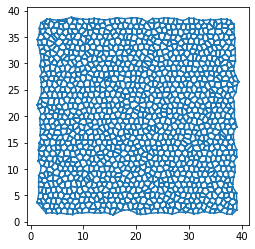

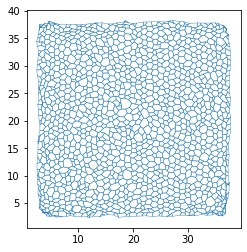

In [17]:
#### Initialize Model
[cellmap_init, geom, energyContributions_model] = vertexModel.initialize()

## Update mechanical parameters
cellmap_init = inputMechanicalParameters.update(cellmap_init)

## Initial stage
energyContributions_model.compute_energy(cellmap_init)

## RUN
[cellmap_H, geom, model_H, history_H] = vertexModel.solveEuler(cellmap_init, geom, energyContributions_model, endTime = 100)


fig, ax = sheet_view(cellmap_H, ['y', 'x'], edge={"color":1, 'colormap': 'Greys'})
#auxFunctions.create_frames(history_H, './results', edge={'color':'black'})
#auxFunctions.exportToMesh(history_H, './results')

import warnings
warnings.filterwarnings("ignore")

In [18]:
fig, ax = sheet_view(cellmap_H, mode="quick")
fig.set_size_inches(20,20)


(array([ 1.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  2.,  1.,  1.,
         2.,  2.,  0.,  3.,  6.,  2.,  6., 13.,  7.,  7., 20., 14., 25.,
        25., 26., 35., 38., 35., 36., 46., 40., 59., 52., 69., 53., 62.,
        55., 63., 47., 47., 42., 43., 49., 39., 35., 23., 29., 30., 26.,
        16., 25., 13., 13., 10., 13.,  9.,  8., 10., 11.,  3.,  3.,  4.,
         4.,  4.,  0.,  1.,  2.,  1.,  3.,  1.,  2.,  2.,  0.,  1.,  1.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.54991511, -0.51400816, -0.47810122, -0.44219427, -0.40628732,
        -0.37038037, -0.33447343, -0.29856648, -0.26265953, -0.22675258,
        -0.19084563, -0.15493869, -0.11903174, -0.08312479, -0.04721784,
        -0.01131089,  0.02459605,  0.060503  ,  0.09640995,  0.1323169 ,
         0.16822384,  0.20413079,  0.24003774,  0.27594469,  0.31185164,
         0.34775858,  0.38366553,  0.41957248,  0.45547943,  0.491386

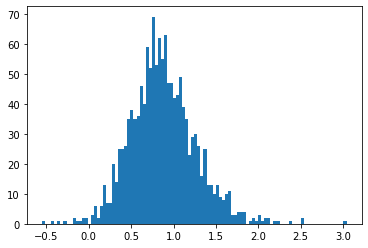

In [22]:
area = cellmap_H.face_df['area']
plt.hist(area, bins = 100)

In [ ]:
cellmap_H.vert_df


In [ ]:
vertex_valence = cellmap_H.edge_df.groupby("srce").size()
vertex_valence
triple_junctions = (vertex_valence == 3).sum()
quadruple_junctions = (vertex_valence == 4).sum()
pent_juctions = (vertex_valence == 5).sum()
print("Number of triple junctions:", triple_junctions)
print("Number of quadruple junctions:", quadruple_junctions)
print("Number of pental junctions:", pent_juctions)

In [ ]:
# Choose % of edges to select at random
percent_to_select = 0.02

# Calculate the number of edges to select
num_to_select = int(percent_to_select * len(cellmap_H.edge_df))

# Iterate until the desired number of edges have been selected
selected_edges = set()
while len(selected_edges) < num_to_select:
    # Get a random edge index
    random_edge_idx = np.random.choice(cellmap_H.edge_df.index)

    # Check if the edge has not been selected before
    if random_edge_idx not in selected_edges:
        selected_edges.add(random_edge_idx)

        collapse_edge(cellmap_H, random_edge_idx)
        cellmap_H.update_rank()
        
        vertex_valence = cellmap_H.edge_df.groupby("srce").size()
        triple_junctions = (vertex_valence == 3).sum()
        quadruple_junctions = (vertex_valence == 4).sum()
        pent_juctions = (vertex_valence == 5).sum()
        print("Number of triple junctions:", triple_junctions)
        print("Number of quadruple junctions:", quadruple_junctions)
        print("Number of pental junctions:", pent_juctions)


geom.update_all(cellmap_H)
fig, ax = sheet_view(cellmap_H, mode="quick")
fig.set_size_inches(20, 20)

print("Maximum vertex rank: ", cellmap_H.vert_df['rank'].max())


In [ ]:
area =cellmap_H.face_df['area']
plt.hist(area, bins=100)

In [ ]:
# Choose % of edges to select at random
#percent_to_select = 0.05

# Calculate the number of edges to select
#num_to_select = int(percent_to_select * len(cellmap_H.edge_df))


# Iterate until the desired number of edges have been selected
#selected_edges = set()
#while len(selected_edges) < num_to_select:
#    # Get a random edge index
#    random_edge_idx = np.random.choice(cellmap_H.edge_df.index)#

    # Check if the edge has not been selected before
#    if random_edge_idx not in selected_edges:
#        selected_edges.add(random_edge_idx)

#        collapse_edge(cellmap_H, random_edge_idx)
#        cellmap_H.update_rank()

#geom.update_all(cellmap_H)
#fig, ax = sheet_view(cellmap_H, mode="quick")
#fig.set_size_inches(20,20)


        
#print("Maximum vertex rank: ", cellmap_H.vert_df['rank'].max())

In [ ]:
energyContributions_model.compute_energy(cellmap_H)

## RUN
[cellmap_D, geom, model_D, history_H] = vertexModel.solveEuler(cellmap_H, geom, model_H, endTime = 10)



fig, ax = sheet_view(cellmap_D, mode="quick")
fig.set_size_inches(20,20)

In [ ]:
fig, ax = sheet_view(cellmap_H, mode="quick", ax=ax, edge={"alpha": 0.5})
fig.set_size_inches(20,20)
fig

In [ ]:
vertex_valence = cellmap_H.edge_df.groupby("srce").size()
vertex_valence
triple_junctions = (vertex_valence == 3).sum()
quadruple_junctions = (vertex_valence == 4).sum()
pent_juctions = (vertex_valence == 5).sum()
hex_juctions = (vertex_valence == 6).sum()
print("Number of triple junctions:", triple_junctions)
print("Number of quadruple junctions:", quadruple_junctions)
print("Number of pental junctions:", pent_juctions)
print("Number of hexagonal junctions:", hex_juctions)

In [ ]:
cellmap_H, new_edges_indices, new_opp_edges_indices, new_vertices_indices = cellDivision.ln_divide_FRCs(cellmap_H, "length", 5, energyContributions_model)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


cellmap_H.edge_df["color_edges"] = 0
cellmap_H.edge_df['edge_width'] = 1

    
cellmap_H.edge_df.loc[1, "color_edges"] = 256
cellmap_H.edge_df.loc[1, 'edge_width'] = 4




specs = {
    'face': {
        'visible': False,
    },
    'edge': {
            'visible': True,
            'color': cellmap_H.edge_df['color_edges'],
            'colormap': 'coolwarm',
            'width' : cellmap_H.edge_df['edge_width'],
    },
    'vert': {
        'visible': True,
        'color' : '#000a4b',
        's' : 20,
    }
}



fig, ax = sheet_view(cellmap_H, **specs)
fig.set_size_inches((15, 15))

ax.set_facecolor('#EFEFEF')  # Set background color to light gray


# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

#ax.set_zorder(0)  # Set a lower zorder value to move the background to the back

plt.title('Spatial distribution of daughter FRCs', fontsize = 20)

plt.show()



